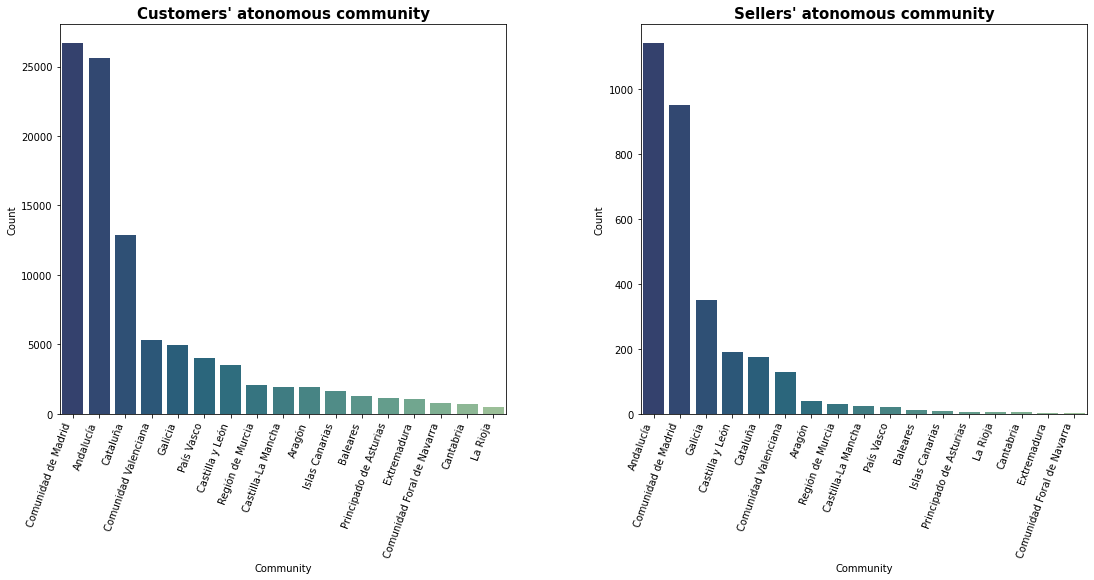

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_geo = pd.read_csv('01.geo.csv', sep=";", encoding = 'unicode_escape')
df_customers = pd.read_csv('02.customers.csv', sep=";", encoding = 'unicode_escape')
df_sellers = pd.read_csv('03.sellers.csv', sep=";", encoding = 'unicode_escape')
df_orderstatus = pd.read_csv('04.order_status.csv', sep=";", encoding = 'unicode_escape')
df_orderitems = pd.read_csv('05.order_items.csv', sep=";", encoding = 'unicode_escape')
df_orderpayments = pd.read_csv('06.order_payments.csv', sep=";", encoding = 'unicode_escape')
df_productreviews = pd.read_csv('07.product_reviews.csv', sep=";", encoding = 'unicode_escape')
df_products = pd.read_csv('08.products.csv', sep=";", encoding = 'unicode_escape')


#### EXPLORATORY DATA ANALYSIS
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.tight_layout()
df_countplot = df_customers.drop_duplicates(subset=['customer_unique_id'])
g1 = sns.countplot(x = 'customer_autonomous_community',data = df_countplot,palette='crest_r', ax=axes[0],
                  order=df_countplot.groupby('customer_autonomous_community').size().sort_values().index[::-1])
g1.set_xticklabels(g1.get_xticklabels(), rotation=70, horizontalalignment='right')
g1.set_title("Customers' atonomous community",fontweight="bold", size=15)
g1.set_xlabel("Community")
g1.set_ylabel("Count")

df_countplot2 = df_sellers.drop_duplicates(subset=['seller_id'])
g2 = sns.countplot(x = 'seller_autonomous_community',data = df_countplot2,palette='crest_r', ax=axes[1],
                  order=df_countplot2.groupby('seller_autonomous_community').size().sort_values().index[::-1])
g2.set_xticklabels(g2.get_xticklabels(), rotation=70, horizontalalignment='right')
g2.set_title("Sellers' atonomous community",fontweight="bold", size=15)
g2.set_xlabel("Community")
g2.set_ylabel("Count")
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.savefig("customers_sellers_communities.png")
plt.show()
del df_countplot
del df_countplot2

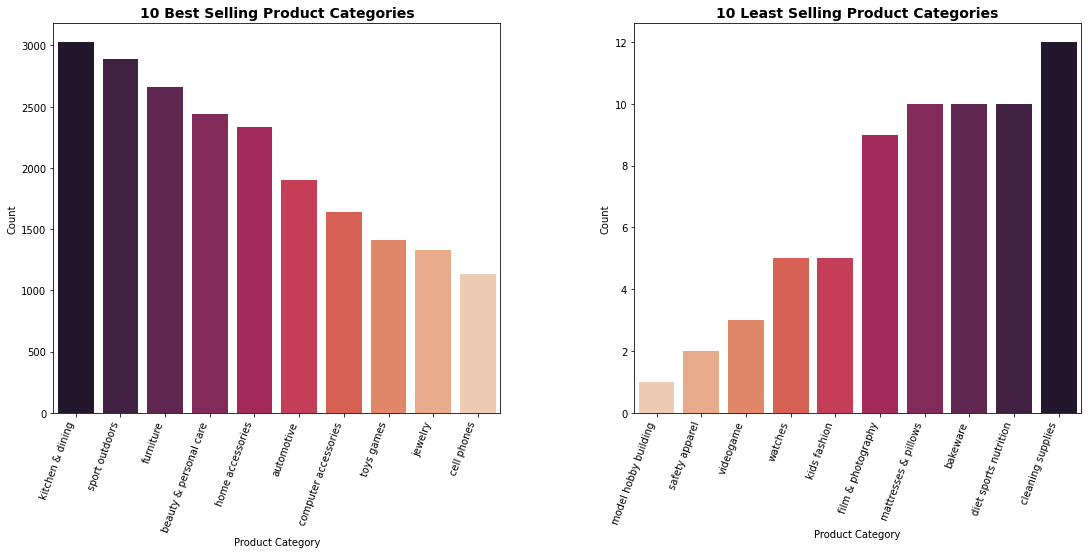

In [2]:
### best and least selling product categories

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.tight_layout()
df_barplot1 = df_products['product_category_name'].value_counts().sort_values(ascending=False).reset_index()
df_barplot1.rename({'index': 'product_category_name', 'product_category_name': 'Count'}, axis=1, inplace=True)
f1 = sns.barplot(x = 'product_category_name',y = "Count",data = df_barplot1.head(10),palette='rocket', ax=axes[0])
f1.set_xticklabels(f1.get_xticklabels(), rotation=70, horizontalalignment='right')
f1.set_title("10 Best Selling Product Categories",fontweight="bold", size=14)
f1.set_xlabel("Product Category")

df_barplot2 = df_products['product_category_name'].value_counts().sort_values(ascending=True).reset_index()
df_barplot2.rename({'index': 'product_category_name', 'product_category_name': 'Count'}, axis=1, inplace=True)
f2 = sns.barplot(x = 'product_category_name',y = "Count",data = df_barplot2.head(10),palette='rocket_r', ax=axes[1])
f2.set_xticklabels(f2.get_xticklabels(), rotation=70, horizontalalignment='right')
f2.set_title("10 Least Selling Product Categories",fontweight="bold", size=14)
f2.set_xlabel("Product Category")
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig("best_least_products_categories.png")
plt.show()
del df_barplot1
del df_barplot2

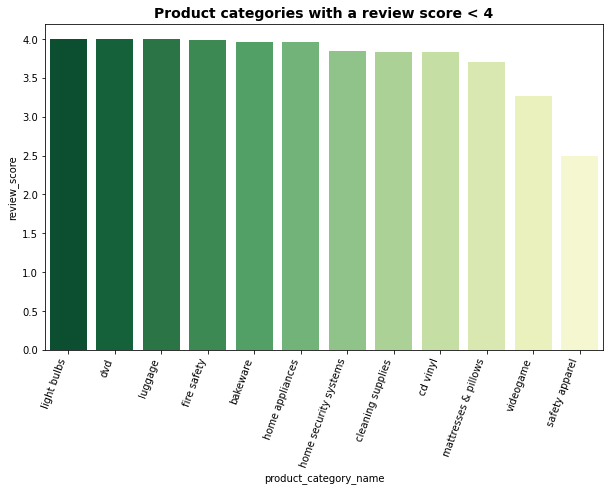

In [3]:
### product categories with a review score < 4

fig, axes = plt.subplots(1, 1, figsize=(10, 6))

vc6 = df_productreviews['product_id'].value_counts().sort_values(ascending=False).reset_index()
vc6 = vc6.rename(columns={"index":"product_id", "product_id": "n_product_bought"})
gb = df_productreviews.groupby('product_id')['review_score'].mean().reset_index()
gb = pd.merge(gb, df_products, how='left')
gb = gb.filter(['review_score', 'product_category_name' ], axis=1)
gb = gb.groupby('product_category_name')['review_score'].mean().reset_index()
rw = sns.barplot(x="product_category_name", y="review_score", data=gb[gb['review_score']<4].sort_values('review_score',ascending = False), palette= "YlGn_r")
rw.set_xticklabels(rw.get_xticklabels(), rotation=70, horizontalalignment='right')
rw.set_title("Product categories with a review score < 4",fontweight="bold", size=14)
plt.show()
